
$\textbf{Taller 2 Metodos Computacionales 2}$

$\textbf{Punto 1}$

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


link = "https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
nombres_colum = ['year', 'month', 'day', "SSN"]

Datos_init = pd.read_csv(link, delim_whitespace=True, skiprows=2, names=nombres_colum)

Datos_init['fecha'] = pd.to_datetime(Datos_init[['year', 'month', 'day']])

fecha_limite = pd.to_datetime("2012-01-01")
Datos_fin = Datos_init[Datos_init['fecha'] < fecha_limite]


$\textbf{1.1)}$

In [145]:
val_manchas=Datos_fin["SSN"].values

Transformada_rapida=np.fft.fft(val_manchas)

n=len(val_manchas)
frecuencias=np.fft.fftfreq(n,d=1)

mag_trans=np.abs(Transformada_rapida)

indmax = np.argmax(mag_trans[1:]) + 1 
fp = frecuencias[indmax]

P_por_año=(1/fp)/365
F_por_año=1/P_por_año
print("la frecuencia principal de la señal por año es",round(F_por_año,4)," y el período del ciclo de actividad solar es", round(P_por_año,2),"años")


la frecuencia principal de la señal por año es 0.0895  y el período del ciclo de actividad solar es 11.17 años


$\textbf{1.2)}$

$\textbf{1.2.a)}$

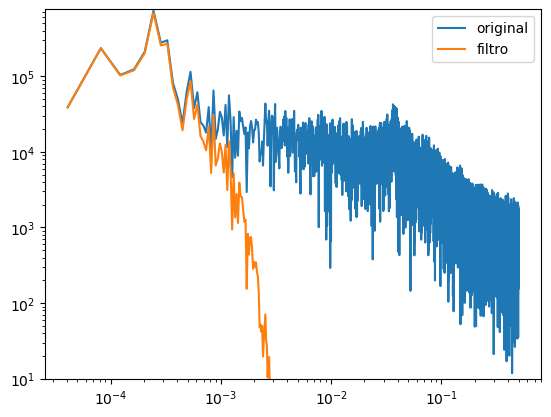

In [146]:


#filtro tipo GAuss 
filtro=Transformada_rapida*np.exp(-(np.abs(frecuencias)*1000)**2)

plt.plot((frecuencias[1:n//2]),(mag_trans[1:n//2]),label="original")

plt.plot((frecuencias[1:n//2]),((np.abs(filtro))[1:n//2]),label="filtro")

plt.ylim(10,)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()



$\textbf{1.2.b)}$

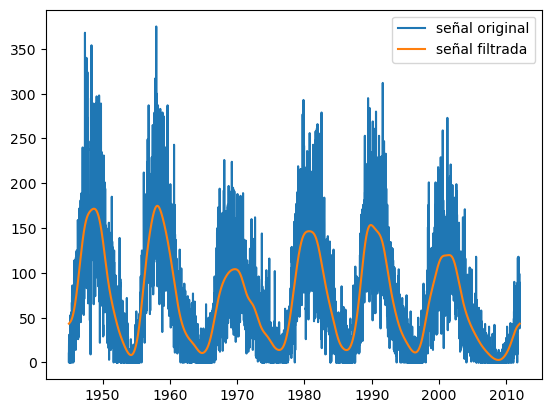

In [147]:
señal_filtrada=np.fft.ifft(filtro)

plt.plot(Datos_fin["fecha"],val_manchas,label="señal original")

plt.plot(Datos_fin["fecha"],np.abs(señal_filtrada),label="señal filtrada")
plt.legend()
plt.show()



Se puede evidenciar que al haber filtrado la señal, mucho del ruido de la señal original se fue.

$\textbf{1.3)}$

In [170]:
n_0=10
primeros_nf=frecuencias[:n_0+1]
ultimos_nf=frecuencias[-n_0:]
f_k=np.concatenate((primeros_nf,ultimos_nf))


primeros_nT=Transformada_rapida[:n_0+1]
ultimos_nT=Transformada_rapida[-n_0:]
T_k=np.concatenate((primeros_nT,ultimos_nT))

[1736241.        +3.96767064e-11j  -23415.64098275-3.08445738e+04j
  -32722.42490498-2.32382576e+05j  -74887.73155892-7.18221440e+04j
  -19137.33213004-1.21566877e+05j   72448.42007358-1.97976472e+05j
  277829.02384407-6.79931364e+05j -213076.58565056+1.75890822e+05j
 -297057.68274101-2.70904850e+04j  -14247.76503071+8.06987063e+04j
  -38792.16057121+3.02240537e+04j  -38792.16057121-3.02240537e+04j
  -14247.76503071-8.06987063e+04j -297057.68274101+2.70904850e+04j
 -213076.58565056-1.75890822e+05j  277829.02384407+6.79931364e+05j
   72448.42007358+1.97976472e+05j  -19137.33213004+1.21566877e+05j
  -74887.73155892+7.18221440e+04j  -32722.42490498+2.32382576e+05j
  -23415.64098275+3.08445738e+04j]


In [149]:
from datetime import date

fecha_inicio = Datos_fin['fecha'].iloc[0].date()

fecha_final = date(2045, 1, 1)

dias_total = (fecha_final - fecha_inicio).days

rango_fechas = pd.date_range(start=fecha_inicio, periods=dias_total + 1, freq='D')

dias = np.arange(0, dias_total + 1)


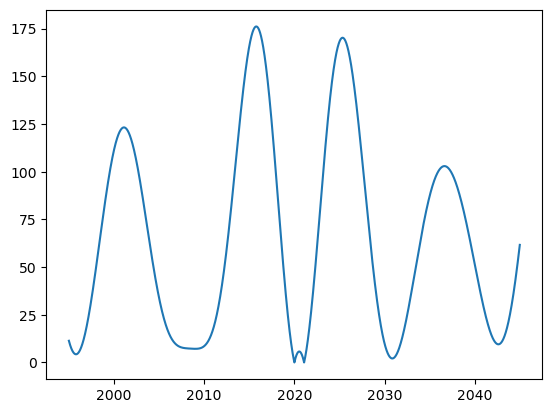

In [182]:
def Inversa(T_func,f_func,N,t):
    s=len(t)
    m=len(f_func)
    inv=np.zeros(s)
    for i in range(s):
        tj=t[i]
        suma=0
        for k in range(m):
            suma+= T_func[k]*np.exp(2*np.pi*1j*tj*f_func[k])
        inv[i]=(1/N)*abs(suma)
    return inv

invers=Inversa(T_k,f_k,n,dias)

plt.plot(rango_fechas[len(rango_fechas)//2:],invers[len(rango_fechas)//2:])

In [180]:
indice_fechas = pd.Index(rango_fechas)

fecha_buscada = pd.Timestamp("2024-08-15")

indi_1_3= indice_fechas.get_loc(fecha_buscada)

Cantidad_de_manchas=invers[indi_1_3]

print("la cantidad de manchas solares a mitad de agosto seran", round(Cantidad_de_manchas))


la cantidad de manchas solares a mitad de agosto seran 161


Por lo tanto, estamos en la parte mas alta del ciclo solar. Este resultado se asemeja bastante al medido.

$\textbf{Punto 2) Transformada 2D}$ 

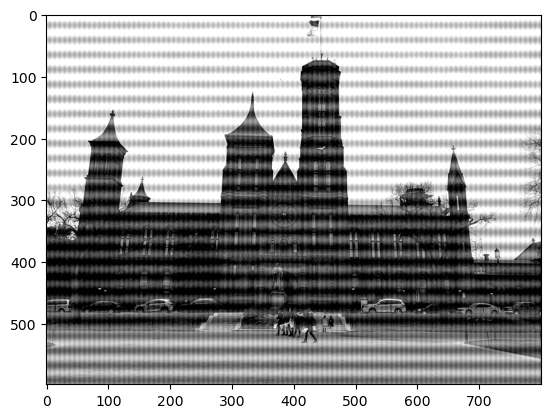

In [183]:
from PIL import Image
import numpy as np
img = np.array(Image.open("imagenTAller2.jpg")).astype(float)

plt.imshow(img, cmap='gray') 

$\textbf{2.1)}$

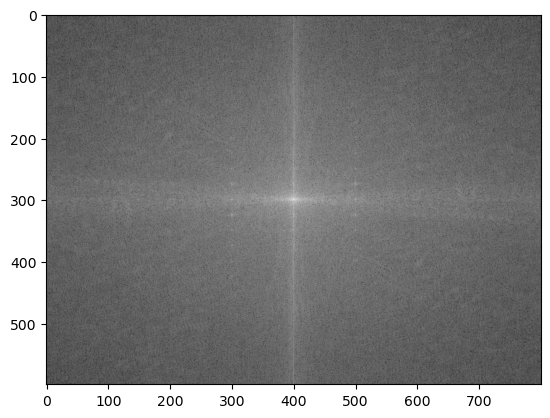

In [186]:
transformada_img = np.fft.fft2(img)

trans_movida = np.fft.fftshift(transformada_img)

magnitud_trans_img = np.abs(trans_movida)
magni_log = np.log1p(magnitud_trans_img)
plt.imshow(magni_log, cmap='gray')

$\textbf{2.2)}$

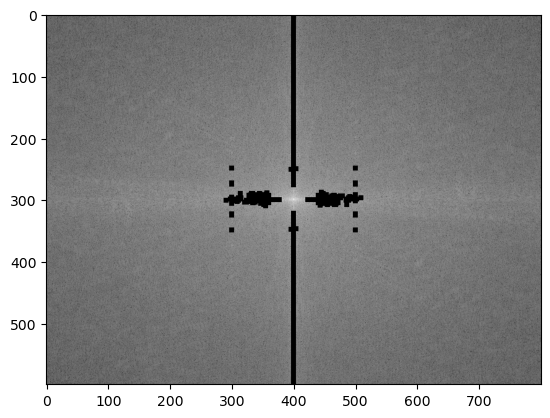

In [416]:
  
ind_puntos_blancos = np.argwhere(magni_log > (np.max(magni_log)*0.64))

altura, ancho = img.shape
Cy= altura // 2
Cx=ancho // 2
r = 40  
r0=23

indices_sin_centro = [] 

for (i, j) in ind_puntos_blancos:
    if not ((Cy - r) < i < (Cy + r) and (Cx-r) < j < (Cx+r) ):
        if  not( (396<j<404 or (296<i<304 and 360<j<440 ))):
            indices_sin_centro.append((i,j))


mov_copia = trans_movida.copy()
for (i, j) in indices_sin_centro:
    mov_copia[i-4:i+4, j-4:j+4] = 0  

for g in range(5,altura):
    if not((Cy - r0) < g < (Cy + r0)):
        mov_copia[g-4:g+4,396:404]=0

for h in range(360,440):
    if not((Cx - r0) < h < (Cx + r0)):
        mov_copia[296:304,h-4:h+4]=0
sii = np.abs(mov_copia)
letsgo = np.log1p(sii)
plt.imshow(letsgo, cmap='gray')



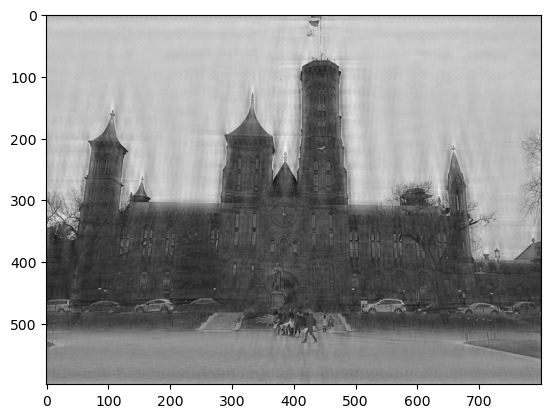

In [417]:
mov_copia = np.fft.ifftshift(mov_copia)

imagen_limpia = np.fft.ifft2(mov_copia).real

plt.imshow(imagen_limpia, cmap='gray')